# Comparison of K-Means and DBSCAN Clustering in Python

In [106]:
import warnings
warnings.filterwarnings('ignore') # Ignore all warnings

# clear variables
#from IPython import get_ipython
#get_ipython().magic('reset -sf')

#1 Importing the libraries
import numpy as np
import pandas as pd
# import pyreadstat                        # conda install -c conda-forge pyreadstat
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')



import sys

!{sys.executable} -m pip install scipy
from scipy.stats import norm, skew 

!{sys.executable} -m pip install kneed
from kneed import KneeLocator             # conda install -c conda-forge kneed

!{sys.executable} -m pip install scikit-learn
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


warnings.filterwarnings('default')  # enable the display of warning messages

    The data includes the following features:

        Customer ID

        Customer Gender

        Customer Age

        Annual Income of the customer (in Thousand Dollars)

        Spending score of the customer (based on customer behaviour and spending nature)

In [107]:
#2 Importing the dataset
url = "https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv"
data = pd.read_csv(url, index_col= None, na_values='?')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [109]:
#Looking for null values
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [110]:
#Changing the name of some columns
data = data.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})
data.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


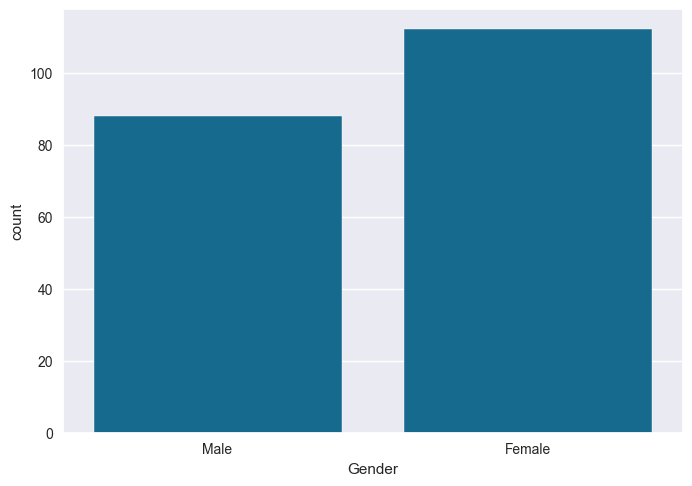

In [111]:
sns.countplot(x='Gender',data = data)
plt.show()

In [112]:
df = data.copy()
#Replacing objects for numerical values
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [115]:
# Display a description of the dataset
stats = df.describe()
stats

,CustomerID,Gender,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


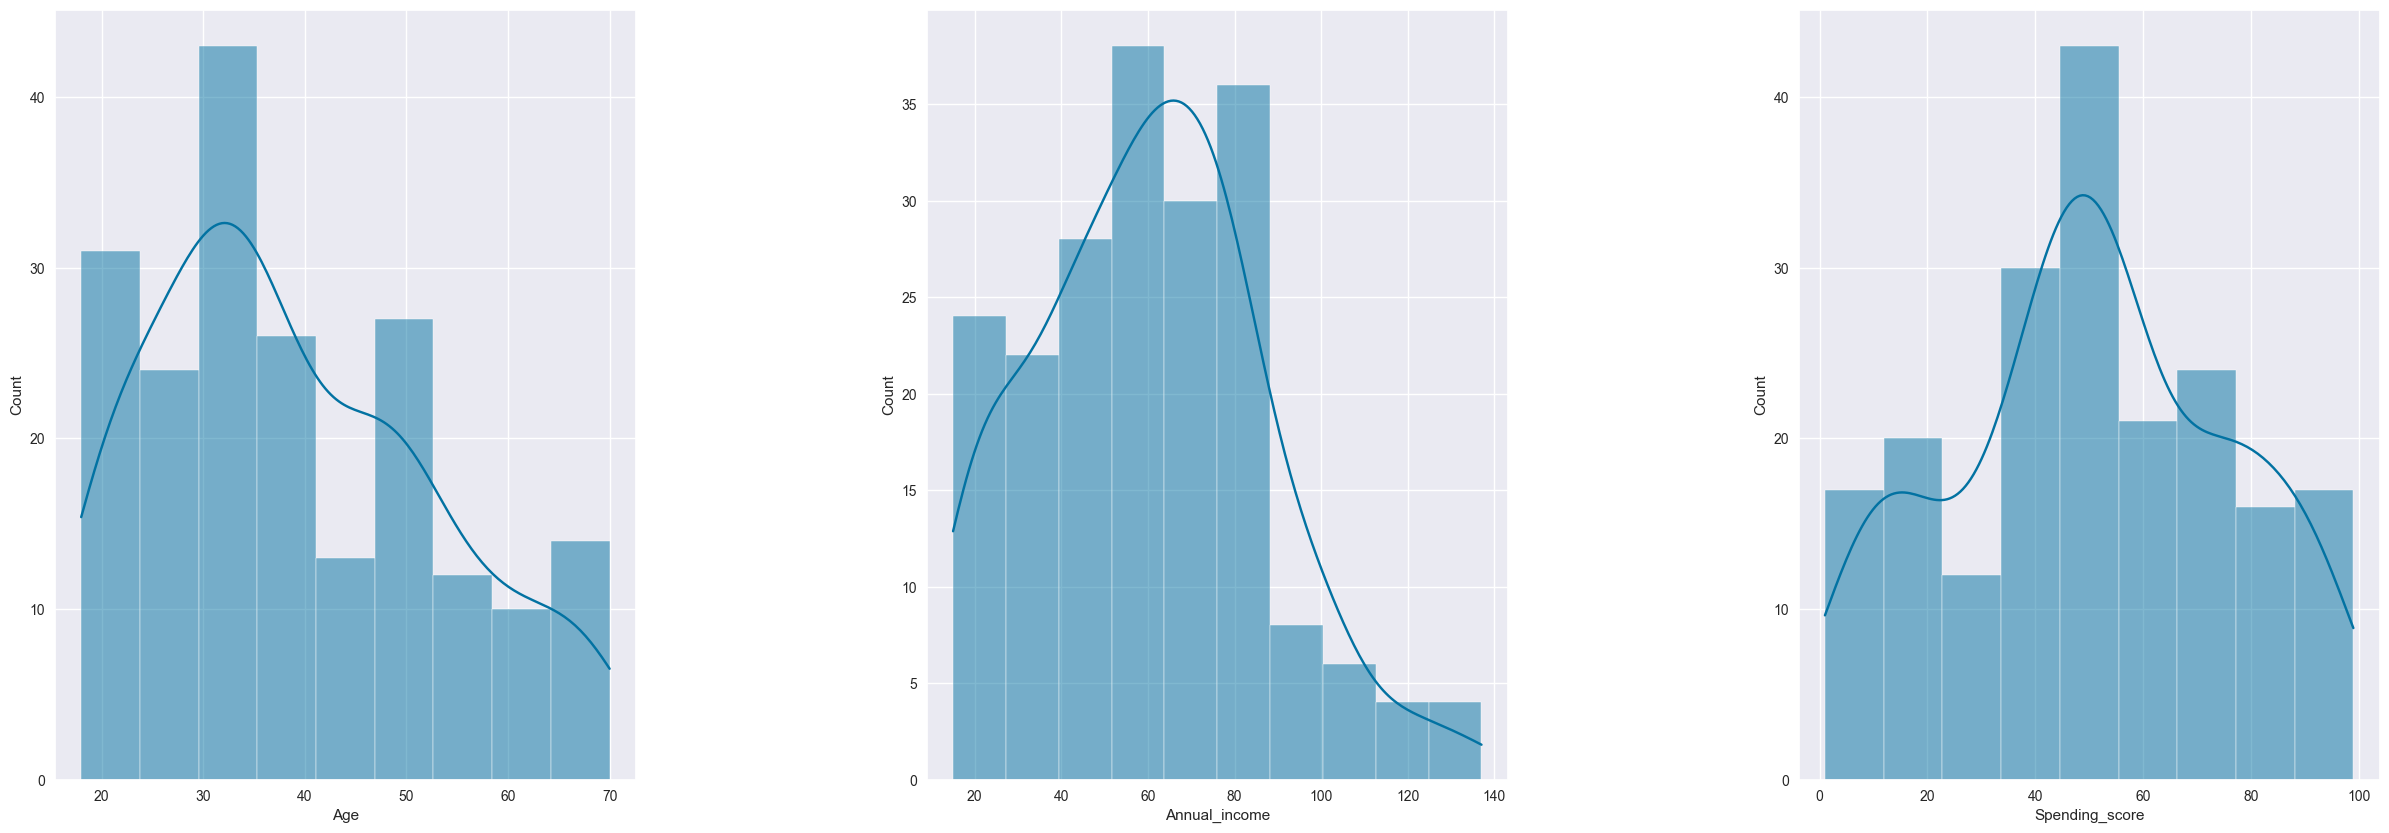

In [116]:
# https://datauab.github.io/mall_segmentation/

plt.figure( figsize = (30 , 10))

# creating a dictionary
font = {'size': 20}
 
# using rc function
plt.rc('font', **font)


feature_list = ['Age','Annual_income', "Spending_score"]

pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df, x=i, kde=True)
    pos = pos + 1
plt.show()
plt.rcdefaults()   # Resetting rcparams to default settings in Matplotlib
#%matplotlib inline

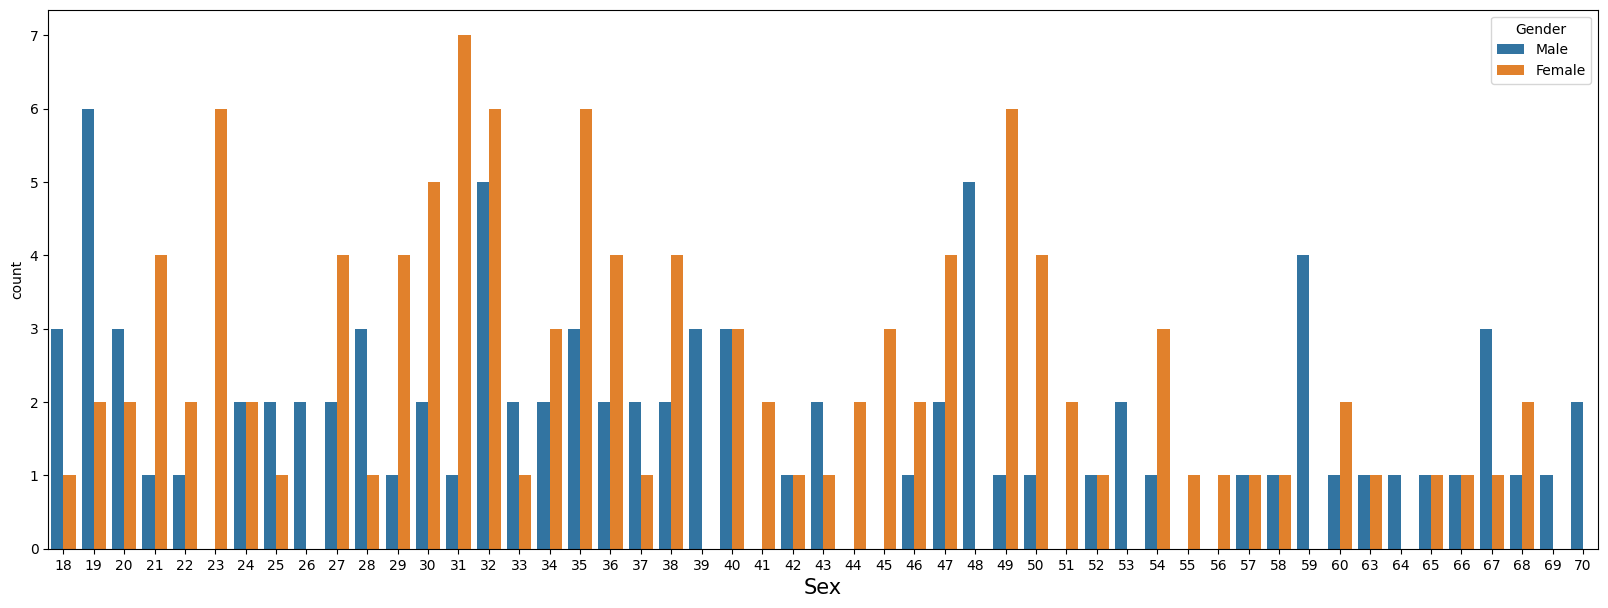

In [117]:
plt.figure(figsize=(20,7))
sns.countplot(data=data,
              x = "Age",
              hue = "Gender")
plt.xlabel("Sex",fontsize = 15)
plt.show()

<Axes: >

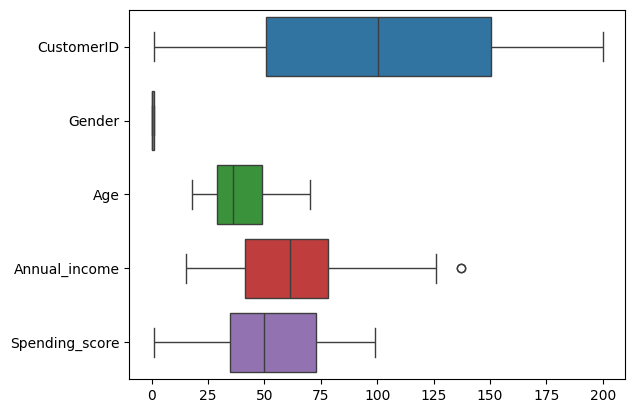

In [118]:
sns.boxplot(data= df,  orient="h")

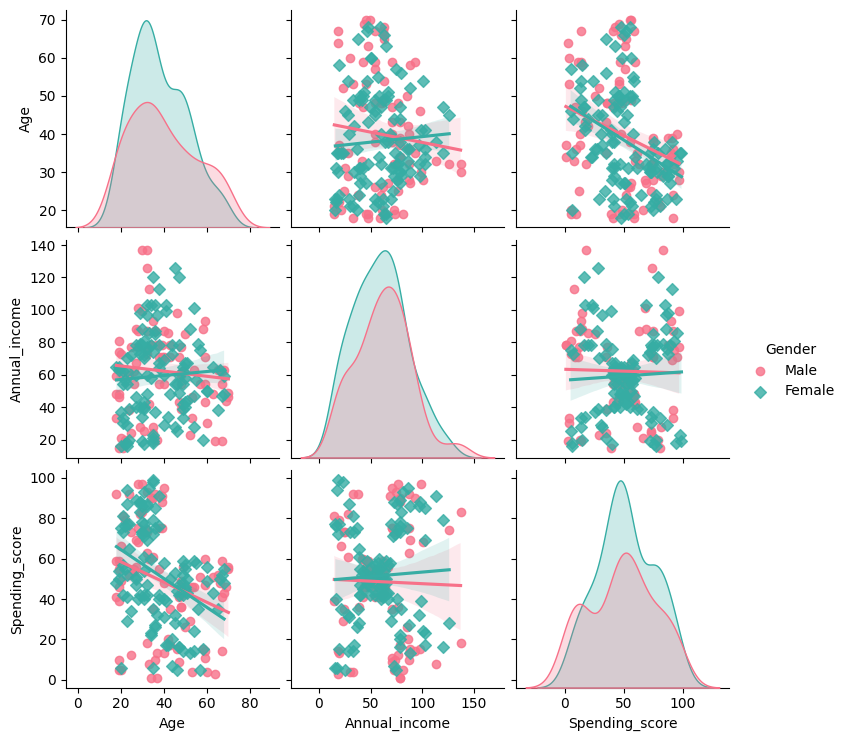

In [119]:
sns.pairplot(data, vars=["Age", "Annual_income", "Spending_score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])


In [120]:
# Average income and spending per sex
data.groupby('Gender').mean()

,CustomerID,Age,Annual_income,Spending_score
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


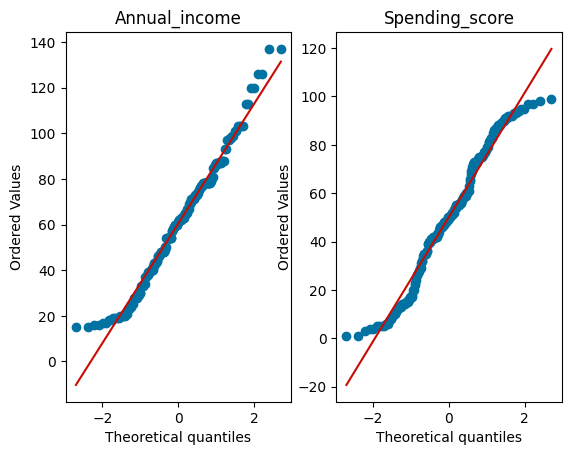

In [121]:
# QQ-plot
from scipy import stats as stats

fig = plt.figure()
ax = fig.add_subplot(121)
res =stats.probplot(df['Annual_income'], plot=plt)
ax.set_title('Annual_income') 

ax = fig.add_subplot(122)
res = stats.probplot(df['Spending_score'], plot=plt)
ax.set_title('Spending_score') 
plt.show()

### Kmeans Algorithm

C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

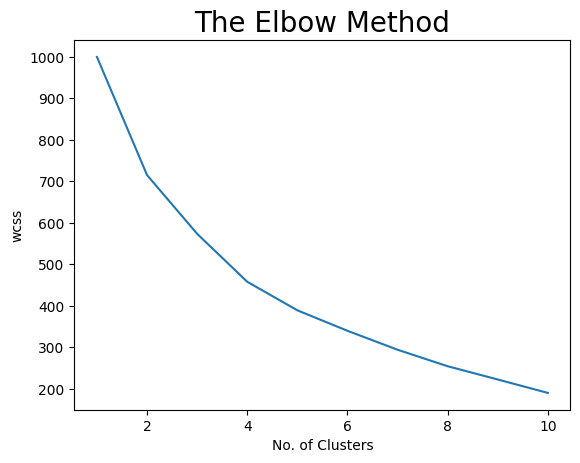

In [122]:
wcss = []

# Scaling data
X_std = StandardScaler().fit_transform(df)

# find number of clusters
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 123)
    km.fit(X_std)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [123]:
kl = KneeLocator( range(1, 11), wcss, curve="convex", direction="decreasing" )
print("The best k=",kl.elbow)

The best k= 4


#### quick look at pairs of variables with scatter plot : Spending score and annual income make a perfect pair for clustering. 

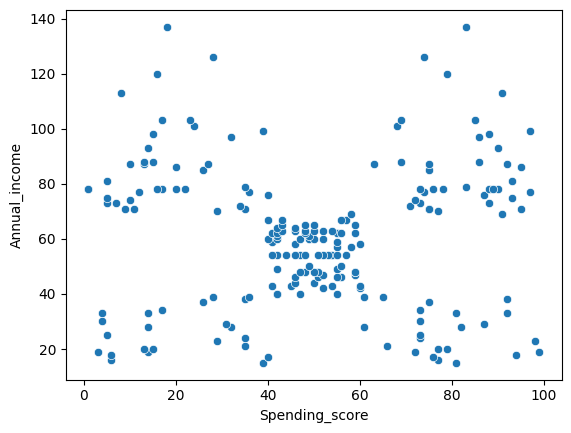

In [124]:
g =sns.scatterplot(x="Spending_score", y="Annual_income", data=df)   
                  

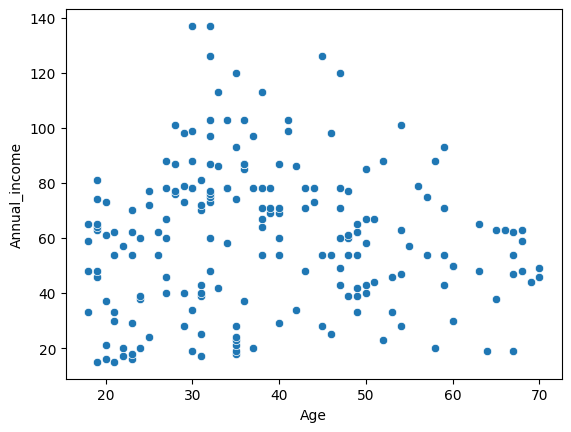

In [125]:
g =sns.scatterplot(x="Age", y="Annual_income", data=df)

C:\Users\simon\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=7>
  return process_handler(cmd, _system_body)
C:\Users\simon\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)
C:\Users\simon\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)
C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

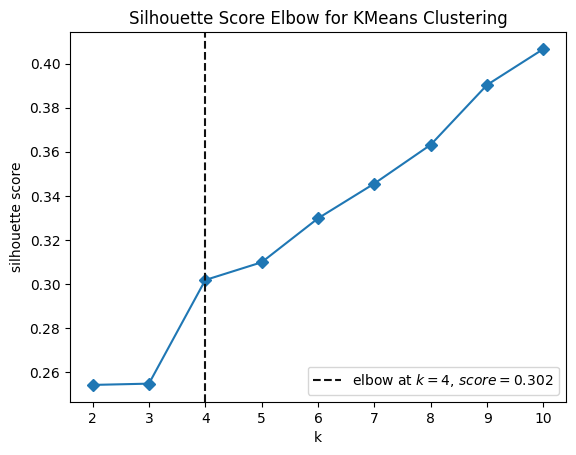

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [126]:
# Import the KElbowVisualizer method   # https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

!{sys.executable} -m pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer   # conda install -c districtdatalabs yellowbrick


# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=456)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_std)    
#visualizer.poof()  
visualizer.show() 

C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

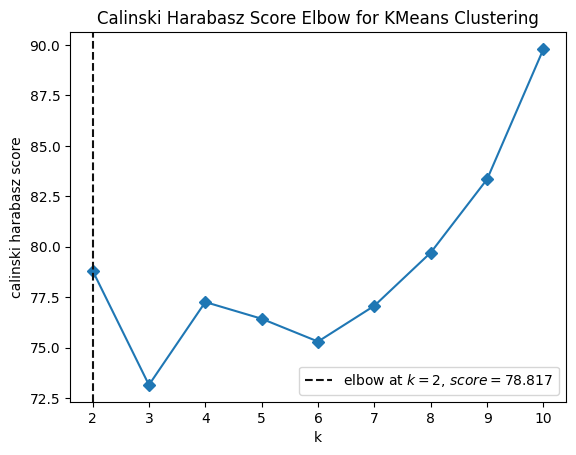

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [127]:
# Instantiate the clustering model and visualizer 
model = KMeans(random_state=789)
visualizer = KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz', timings=False)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

### The silhouette score is the mean silhouette coefficient for all samples, 
### while the calinski_harabasz score computes the ratio of dispersion between and within clusters

### Update K-Means Clustering

In [128]:
# create clustering model with optimal k=5
updated_kmeans_model = KMeans(n_clusters = 5, init='k-means++', max_iter=500, n_init=10, random_state=123)

updated_kmeans_model.fit_predict(X_std)
#data['Cluster'] =(updated_kmeans_model.labels_).astype(str)

# add Cluster number back to the orignal data
ClusterDataset = pd.DataFrame(data=updated_kmeans_model.labels_)
dfClustered = pd.concat([data, ClusterDataset], axis=1)
dfClustered.rename(columns={0:'Cluster'}, inplace=True)


dfClustered.head()

C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual_income,Spending_score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [129]:
dfClustered.iloc[:,2:].groupby(['Cluster']).mean()

,Age,Annual_income,Spending_score
Cluster,,,
0,24.886792,38.509434,60.830189
1,49.463415,48.780488,41.658537
2,39.891892,87.432432,18.837838
3,32.550000,86.050000,81.475000
4,56.724138,48.068966,39.724138


Result:

    Cluster 0 : Low annual income, high spending (young age spendthrift)
    Cluster 1 : Medium annual income, medium spending (young age target customer)
    Cluster 2 : High annual income, low spending (miser)
    Cluster 3 : High annual income, high spending (young age wealthy customer)
    Cluster 4 : Medium annual income, medium spending (old age target customer)

<Axes: xlabel='Spending_score', ylabel='Annual_income'>

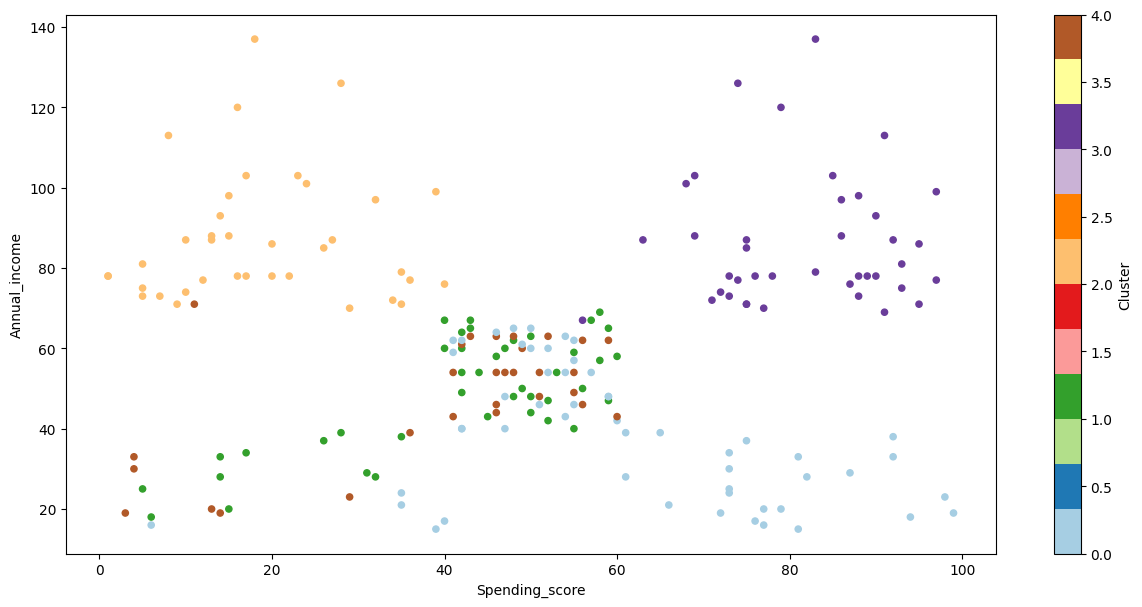

In [130]:
fig, ax = plt.subplots()
dfClustered.plot.scatter(x='Spending_score', y='Annual_income', c='Cluster', figsize=(15,7), cmap="Paired", ax=ax)

<Axes: xlabel='Age', ylabel='Annual_income'>

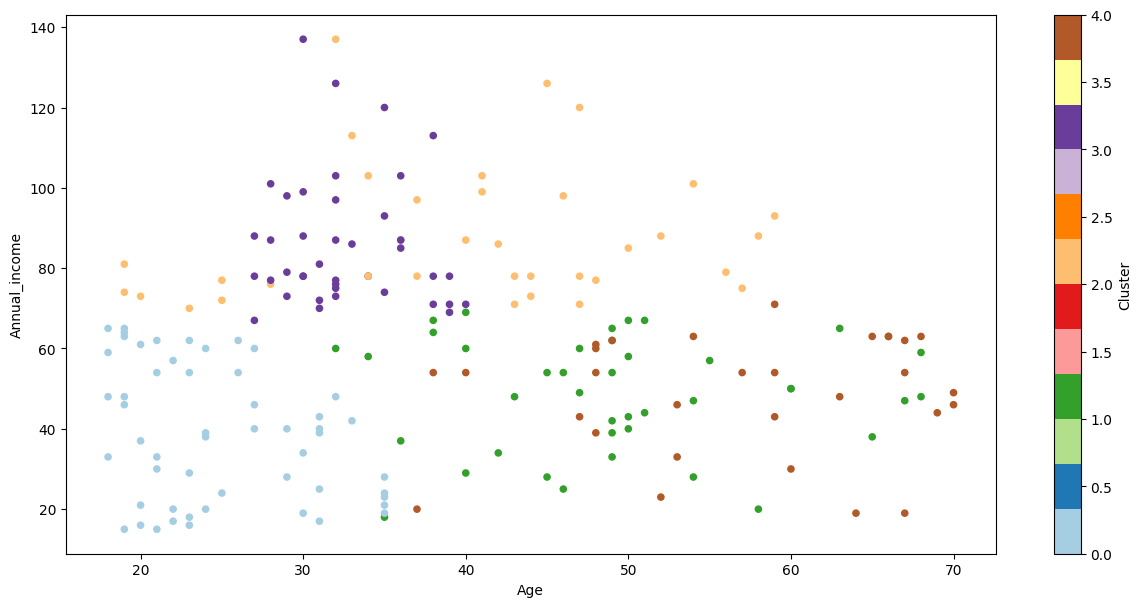

In [131]:
fig, ax = plt.subplots()
dfClustered.plot.scatter(x='Age', y='Annual_income', c='Cluster', cmap="Paired", figsize=(15,7), ax=ax)

### Reference:


https://github.com/EmirKorkutUnal/A-Comparison-of-Clustering-Algorithms-K-means-MeanShift-DBSCAN-in-Python

https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad


### Density-based spatial clustering of applications with noise (DBSCAN) Algorithm

https://github.com/EmirKorkutUnal/A-Comparison-of-Clustering-Algorithms-K-means-MeanShift-DBSCAN-in-Python

DBSCAN creates clusters in a different way than K-means. "min_samples=" allows you to specify a minimum cluster size, and "eps=" is the maximum distance between two obsertavions for them to be considered within the same cluster. This approach allows a more flexible clustering operation, giving control from algorithm to the analyst. Based on these 2 inputs, DBSCAN can also identify some observations as outliers and not include them in any cluster. These observations are labeled with a cluster number of "-1".

https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

The model’s behaviour is dictated by several parameters. 
    eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
    min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.
    metric: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

Minimum Samples (“MinPts”)

There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:

    The larger the data set, the larger the value of MinPts should be
    If the data set is noisier, choose a larger value of MinPts
    Generally, MinPts should be greater than or equal to the dimensionality of the data set
    For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
    If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).
    
Epsilon (ε)

After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is described in this paper. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [132]:
# https://thinkingneuron.com/how-to-create-clusters-using-dbscan-in-python/

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=2, step=0.01)
min_sample_list=np.arange(start=2, stop=20, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
lst = []
colnames=["scores", "parameters"]
silhouette_scores_data=pd.DataFrame(lst, columns = colnames)
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X_std)))>1):
            sil_score=silhouette_score(X_std, db.fit_predict(X_std))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(2)) +"; min_sample :" + str(min_sample_trial)

        silhouette_scores_data=silhouette_scores_data._append({'scores':sil_score,'parameters':trial_parameters}, ignore_index=True )
        
    
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by=['scores'], ascending=False).head(1)

C:\Users\simon\AppData\Local\Temp\ipykernel_16848\3889693633.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  silhouette_scores_data=silhouette_scores_data._append({'scores':sil_score,'parameters':trial_parameters}, ignore_index=True )


,scores,parameters
378,0.252322,eps:0.73; min_sample :2


In [133]:
# another way
# https://365datascience.com/question/hyper-parameter-tuning-in-dbscan-clustering/

range_min = [x for x in range(2, 21, 1)]
range_eps = [x / 100.0 for x in range(1, 200, 1)] 
dic = {}
for m in range_min:

    for e in range_eps:

        model_1 = DBSCAN(eps = e, min_samples = m).fit(X_std)

        core_samples_mask = np.zeros_like(model_1.labels_, dtype = bool)

        core_samples_mask[model_1.core_sample_indices_] = True

        labels = model_1.labels_

        if len( set(labels) ) > 1:

            silhouette_Avg = silhouette_score(X_std, labels)

            if silhouette_Avg > 0:

                dic[str(m) + " - " + str(e)] = silhouette_Avg

                #print("min-sample value is: " + str(m) + " eps value is: " + str(e) , "The avearge silhouette_score is :",                               silhouette_Avg)
 
max_key = max(dic, key = dic.get)
print("parameter values are: ", max_key)
print("maximum silhouette score value is: ", dic[max_key])

parameter values are:  2 - 0.73
maximum silhouette score value is:  0.25232153670932733


Text(0, 0.5, 'Distance')

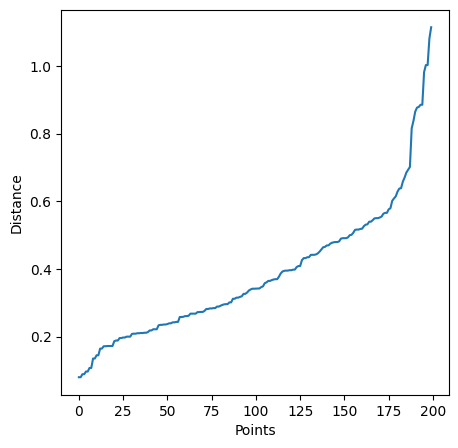

In [134]:
# https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62
# Using Nearest Neighbors method to find eps
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_std)
distances, indices = neighbors.kneighbors(X_std)
distances = np.sort(distances[:,1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
#plt.savefig("Distance_curve.png", dpi=300)

0.5548229882938144


<Figure size 500x500 with 0 Axes>

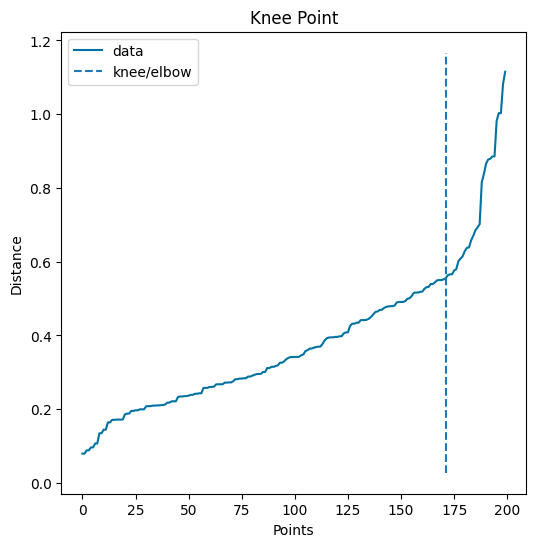

In [135]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [136]:
updated_dbscan_model = DBSCAN(eps=0.55, min_samples=6)
updated_dbscan_model.fit_predict(X_std)
labels = updated_dbscan_model.labels_

#### https://stackoverflow.com/questions/61233304/clustering-with-dbscan-how-to-train-a-model-if-you-dont-set-the-number-of-clust
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_std, labels))

Estimated number of clusters: 4
Estimated number of noise points: 152
Silhouette Coefficient: -0.116


<Axes: xlabel='Spending_score', ylabel='Annual_income'>

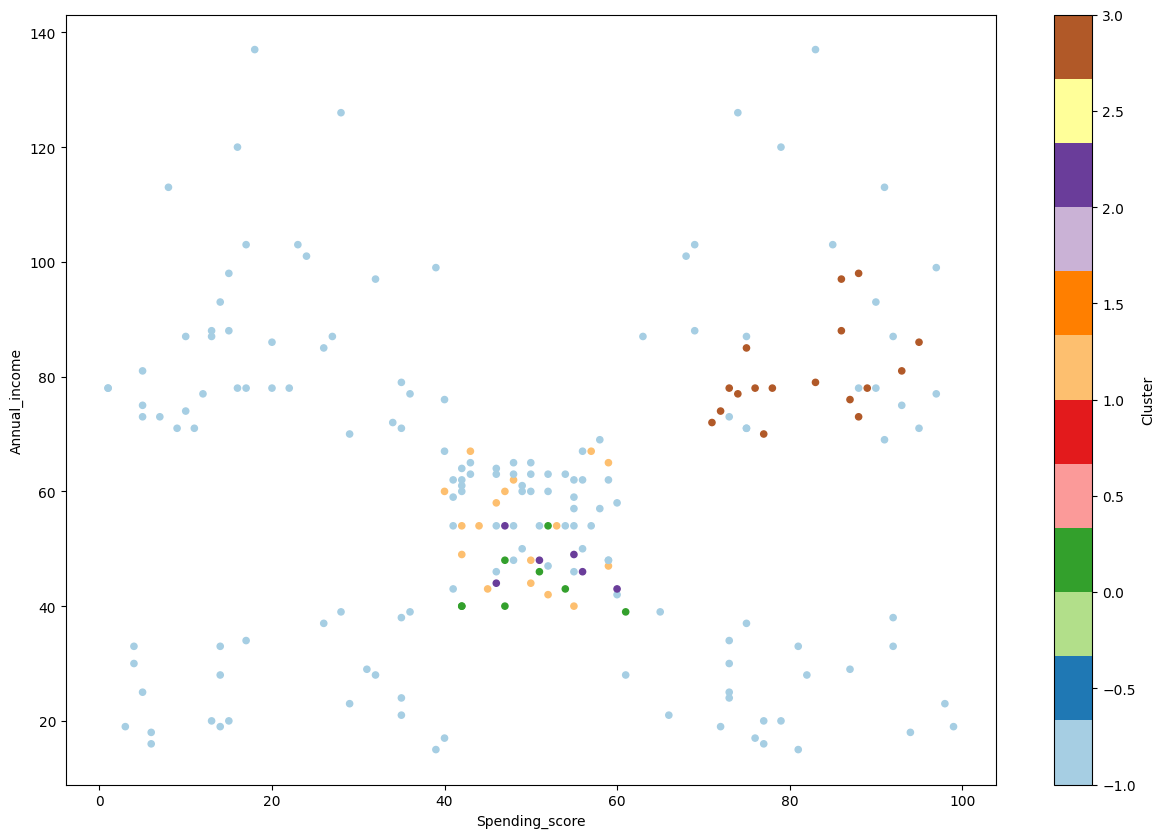

In [137]:
ClusterDataset = pd.DataFrame(data=updated_dbscan_model.labels_)
dfClustered2 = pd.concat([data, ClusterDataset], axis=1)
dfClustered2.rename(columns={0:'Cluster'}, inplace=True)
dfClustered2.plot.scatter(x='Spending_score', y='Annual_income', c='Cluster', cmap="Paired", figsize=(15,10))

<Axes: xlabel='Age', ylabel='Annual_income'>

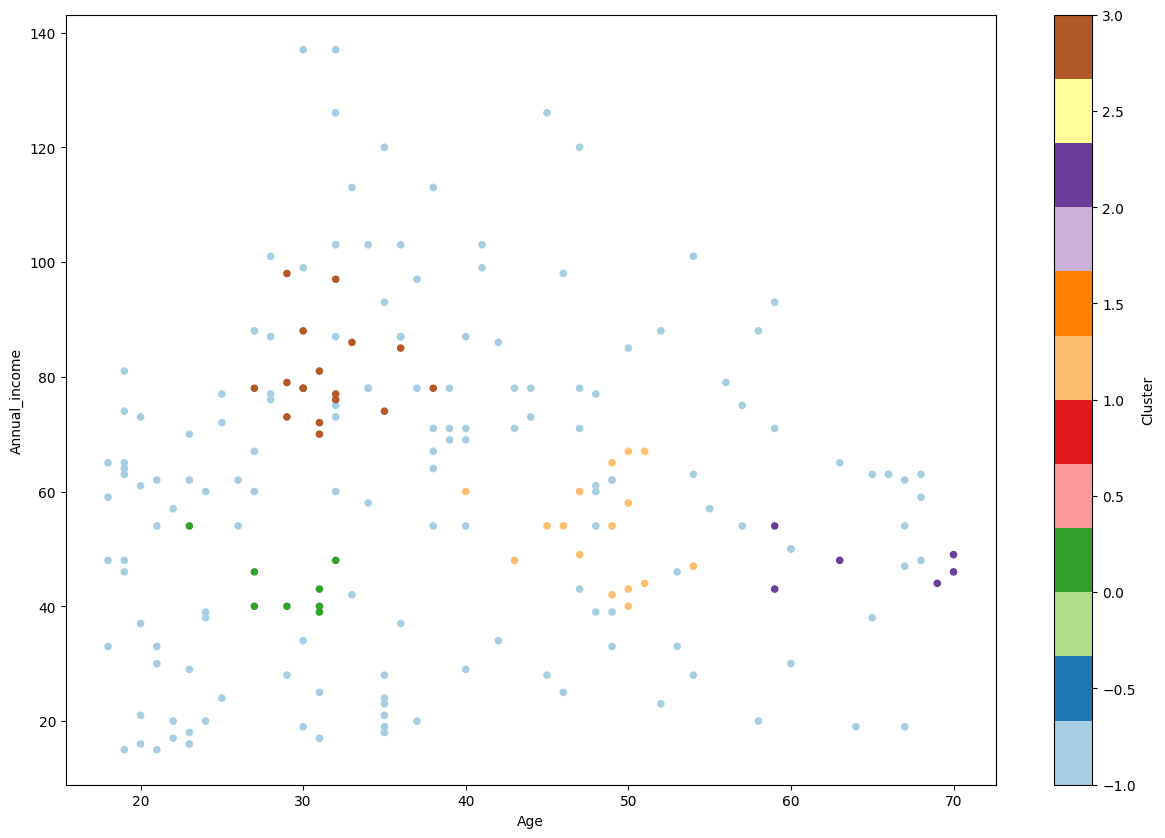

In [138]:
dfClustered2.plot.scatter(x='Age', y='Annual_income', c='Cluster', cmap="Paired", figsize=(15,10))

In [139]:
dfClustered2.head()

,CustomerID,Gender,Age,Annual_income,Spending_score,Cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,-1


In [140]:
dfClustered2.iloc[:,2:].groupby(['Cluster']).mean()

,Age,Annual_income,Spending_score
Cluster,,,
-1,38.118421,60.500000,46.750000
0,28.875000,43.750000,49.500000
1,48.235294,53.764706,48.941176
2,65.000000,47.333333,52.500000
3,31.470588,80.470588,81.823529


#### Cluster = -1 is outliers

### Reference

https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/

https://medium.com/@mohantysandip/a-step-by-step-approach-to-solve-dbscan-algorithms-by-tuning-its-hyper-parameters-93e693a91289

https://www.kaggle.com/mandypham/mall-customer-segmentation

https://towardsdatascience.com/mall-customers-segmentation-using-machine-learning-274ddf5575d5

https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3

https://datauab.github.io/mall_segmentation/

https://medium.com/analytics-vidhya/mall-customers-cluster-analysis-b2ece6effdaa

https://stackoverflow.com/questions/65475105/clustering-scaled-3d-data-with-dbscan-best-eps-value-mall-customer-segmentati

https://www.kaggle.com/datark1/customers-clustering-k-means-dbscan-and-ap

https://elitedatascience.com/machine-learning-algorithms

#### K-Means:
    Strengths: K-Means is hands-down the most popular clustering algorithm because it's fast, simple, and surprisingly flexible if you pre-process your data and engineer useful features.
    Weaknesses: The user must specify the number of clusters, which won't always be easy to do. In addition, if the true underlying clusters in your data are not globular, then K-Means will produce poor clusters.

https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e
    
    K-means performs poorly because the underlying assumptions on the shape of the clusters are not met; it is a parametric algorithm parameterized by the K cluster centroids, the centers of gaussian spheres. 

#### DBSCAN:
    Strengths: DBSCAN does not assume globular clusters, and its performance is scalable. In addition, it doesn't require every point to be assigned to a cluster, reducing the noise of the clusters (this may be a weakness, depending on your use case).
    Weaknesses: The user must tune the hyperparameters 'epsilon' and 'min_samples,' which define the density of clusters. DBSCAN is quite sensitive to these hyperparameters.

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
    
    The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

from https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/

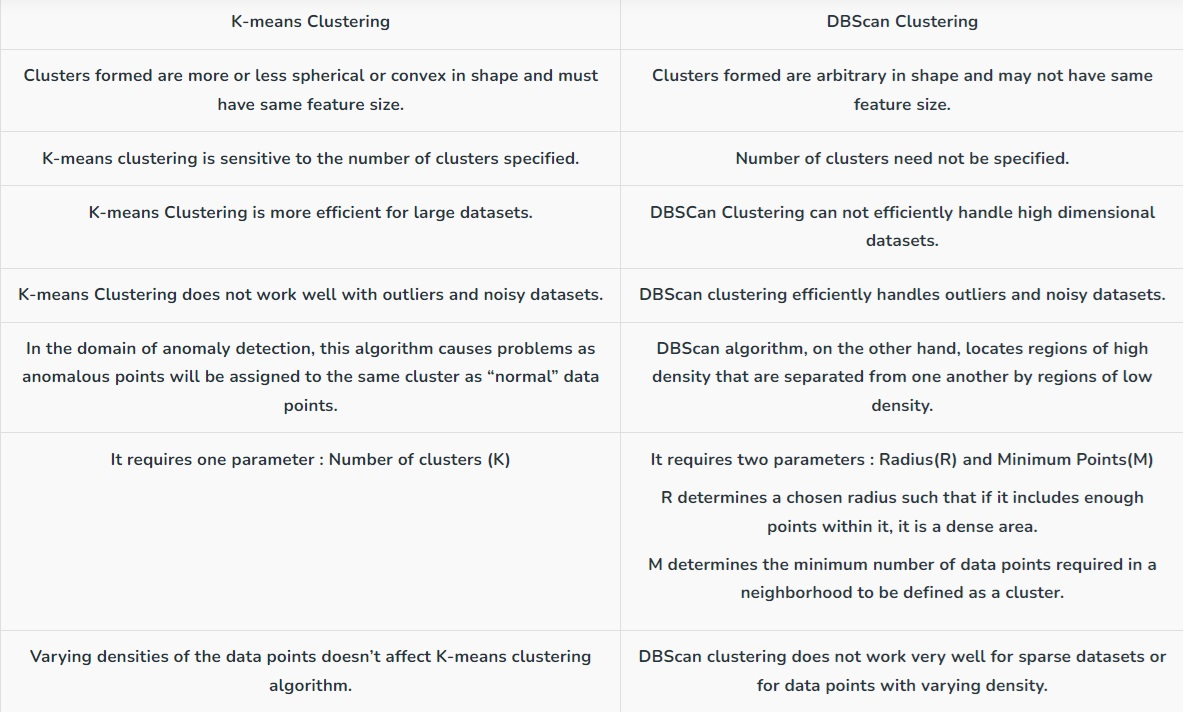